# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [68]:
%pylab inline
import numpy as np
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


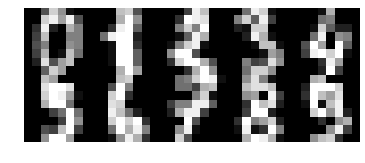

In [69]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)), interpolation = 'nearest')

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [70]:
#Make a prediction function h
def prediction_function(x,theta):
# The prediction function takes x and theta as an input, 
# which are both vectors and outputs a vector. 
    return 1/(1+exp(-1*np.dot(x, theta)))

In [71]:
#Use the output of that function to compute the cost function J:
def safe_log(x): 
#We define a new function that prevents NaN as an output of the cost_function
#The function returns a 0 when it is negative or equal to zero
#Otherwise it returns the log value of x
    if x <= 0: 
        return 0
    return np.log(x)

def cost_function(x_predict,y):  
# The cost_function takes in two vectors x_predict and y, 
# and outputs a scalar, which gives error of x_predict. 
# The function calculates the following:
# J(theta) = (1/m) * sum_{i=1}^m (y^i * log(h(x^i))) + (1-y^i)log(1-h(x^i))
    m = len(y)
    J = 0 
    for i in range(m):
        temp = y[i] * safe_log(x_predict[i]) + (1-y[i]) * safe_log(1-x_predict[i])
        J = J + temp
    return (-1/m) * J

In [72]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
# For the gradient descent, we have to update the theta values simultaneously
# Therefore, we have to store all the gradient values in one matrix and 
# the gradient value for each theta_j is given by 
# (x^i - y^i)x_j
    gradJ = np.zeros((64,10))
    m = len(y)
    for i in range(m):
        gradJ[:,i] = (x_predict[i] - y[i])*x
    return gradJ 

total number of correct predictions: 251 digits
total number of incorrect predictions: 46 digits
accuracy: 85.0%


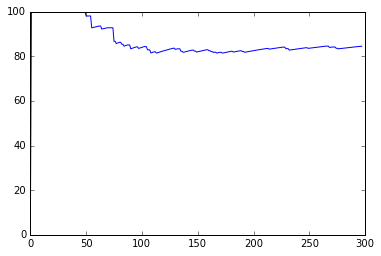

In [81]:
#Choose a suitable learning rate
alpha = 0.001 # alpha = 0.001 gives us an accuracy of 85%. Lowering alpha gives us a higher accuracy
iterations = 25
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

# cost_vec = np.zeros(1500)

for i in range(iterations):
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:].T,theta)
        y = np.zeros(10)
        y[target[j]] = 1
        
#        cost_vec[j] = cost_function(x_predict,y)
        # we update the theta simulatenously and store each theta 
        theta = theta - alpha * compute_gradient(x_predict, y, x[j,:])
        
totalIterations = shape(x_test)[0]
counter = 0
accuracy_vec = 0 
for i in range(totalIterations):
    x_predict = prediction_function(x_test[i], theta)
    if argmax(x_predict) == target_test[i]:
        counter = counter + 1
        accuracy = (counter/(i+1))*100
    accuracy_vec = np.append(accuracy_vec, accuracy)
        
plt.plot(accuracy_vec)

wrong = totalIterations - counter
percent = round((counter/totalIterations)*100)
print "total number of correct predictions: " + str(counter) + " digits"
print "total number of incorrect predictions: " + str(wrong) + " digits"
print "accuracy: " + str(percent) + "%"
